In [1]:
# Importing required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

### MNIST Dataset

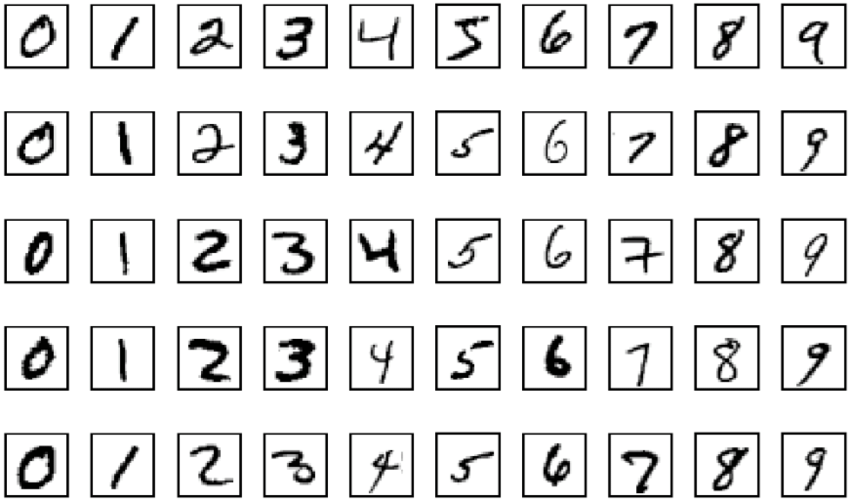

In [2]:
# Fetch dataset
mnist = tf.keras.datasets.mnist

In [3]:
# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape 

(60000, 28, 28)

In [5]:
X_train[0].shape

(28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_train[0]

5

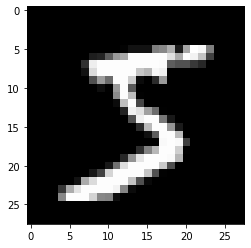

In [8]:
# View sample image
plt.imshow(X_train[0], cmap='gray')

In [9]:
# Create validation dataset
X_valid, X_train = X_train[:5000]/255, X_train[5000:]/255
y_valid, y_train = y_train[:5000], y_train[5000:]

X_test = X_test/255

In [10]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
# Output classes
CLASSES = len(np.unique(y_train))
CLASSES

10

### Build ANN

In [12]:
# Define model layers
LAYERS = [
    tf.keras.layers.Flatten(input_shape=(28, 28), name='inputLayer'), # 784
    tf.keras.layers.Dense(300, activation='relu', name='hiddenLayer01'), # 300
    tf.keras.layers.Dense(100, activation='relu', name='hiddenLayer02'), # 100
    tf.keras.layers.Dense(CLASSES, activation='softmax', name='outputLayer'), # 10
]

In [13]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [14]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
# weights + biases 
784*300 + 300

235500

In [16]:
# weights + biases 
300*100 + 100

30100

In [17]:
# weights + biases 
100 * 10 + 10

1010

In [18]:
LOSS_FUNCTION = 'sparse_categorical_crossentropy'
OPTIMIZERS = 'SGD'
METRICS = ['accuracy']

model_clf.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZERS, metrics=METRICS)

In [19]:
# Train model
EPOCHS = 30

VALIDATION = (X_valid, y_valid)

history = model_clf.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    batch_size=32,
    validation_data=VALIDATION
)

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.5886 - accuracy: 0.8475 - val_loss: 0.3049 - val_accuracy: 0.9158
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2882 - accuracy: 0.9174 - val_loss: 0.2439 - val_accuracy: 0.9312
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2367 - accuracy: 0.9322 - val_loss: 0.2070 - val_accuracy: 0.9426
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2020 - accuracy: 0.9431 - val_loss: 0.1774 - val_accuracy: 0.9512
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1760 - accuracy: 0.9498 - val_loss: 0.1580 - val_accuracy: 0.9584
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1553 - accuracy: 0.9558 - val_loss: 0.1463 - val_accuracy: 0.9616
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1392 - accuracy: 0.9604 - val_loss: 0.1321 - val_accuracy:

In [20]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.588643,0.847473,0.304875,0.9158
1,0.288199,0.917400,0.243854,0.9312
2,0.236654,0.932218,0.207018,0.9426
3,0.202030,0.943073,0.177434,0.9512
4,0.176023,0.949818,0.157982,0.9584
5,0.155320,0.955818,0.146299,0.9616
6,0.139171,0.960400,0.132105,0.9646
7,0.126225,0.963818,0.123572,0.9660
8,0.114666,0.967200,0.113425,0.9686
9,0.104994,0.970473,0.110345,0.9674


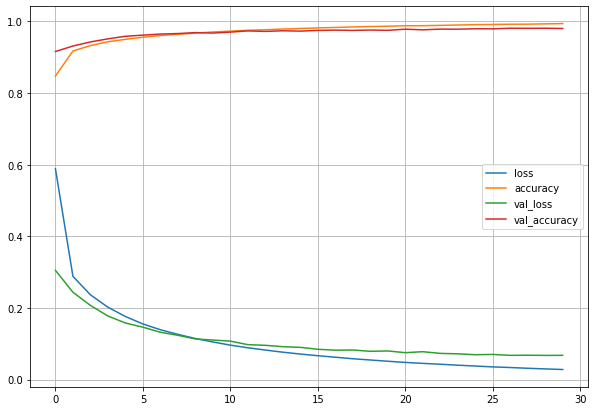

In [21]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [22]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0703 - accuracy: 0.9770


[0.07030316442251205, 0.9769999980926514]

In [23]:
model_clf.save('mnist_full.h5')

In [24]:
# Get predictions
X_new = X_test[:3]

y_prob = model_clf.predict(X_new)
y_prob.round(3)

1/1 [==============================] - 0s 75ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

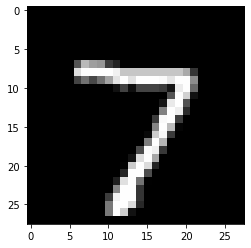

In [25]:
plt.imshow(X_new[0], cmap='gray')

In [26]:
Y_pred = np.argmax(y_prob, axis=1)
Y_pred

array([7, 2, 1], dtype=int64)

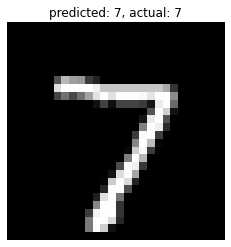

------------------------------------------------------------


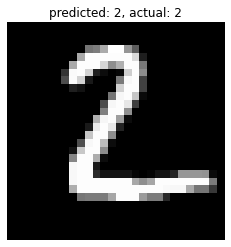

------------------------------------------------------------


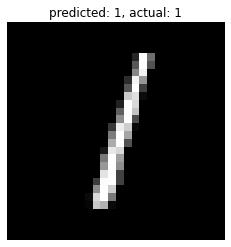

------------------------------------------------------------


In [27]:
# View predictions
for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
    plt.imshow(img_array, cmap='gray')
    plt.title(f'predicted: {pred}, actual: {actual}')
    plt.axis('off')
    plt.show()
    print('--'*30)

### Transfer Learning

#### Probelm Statement

Classify handwritten digit into `odd` and `even`

In [28]:
pretrained_model = tf.keras.models.load_model('mnist_full.h5')
pretrained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [29]:
for layer in pretrained_model.layers:
    print(f'{layer.name}: {layer.trainable}')

inputLayer: True
hiddenLayer01: True
hiddenLayer02: True
outputLayer: True


In [30]:
# Freeze layers other than output layer
for layer in pretrained_model.layers[:-1]:
    layer.trainable = False

In [31]:
for layer in pretrained_model.layers:
    print(f'{layer.name}: {layer.trainable}')

inputLayer: False
hiddenLayer01: False
hiddenLayer02: False
outputLayer: True


In [32]:
# Excluding output layer
lower_pretrained_model = pretrained_model.layers[:-1]

In [33]:
# Create new model
new_model = tf.keras.models.Sequential(lower_pretrained_model)
new_model.add(tf.keras.layers.Dense(2, activation='softmax'))
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 dense (Dense)               (None, 2)                 202       
                                                                 
Total params: 265,802
Trainable params: 202
Non-trainable params: 265,600
_________________________________________________________________


In [34]:
# weights + biases 
100 * 2 + 2

202

In [35]:
# Update training data
def update_even_odd_labels(labels):
    for idx, label in enumerate(labels):
        labels[idx] = np.where(label%2==0, 1, 0) # 1 -> even, 0 -> odd
    return labels

In [36]:
# Update labels
y_train_bin, y_test_bin, y_valid_bin = update_even_odd_labels([y_train, y_test, y_valid])

In [37]:
np.unique(y_train_bin)

array([0, 1])

In [38]:
new_model.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZERS, metrics=METRICS)

In [39]:
# Train model
EPOCHS = 10

VALIDATION = (X_valid, y_valid_bin)

history = new_model.fit(
    X_train,
    y_train_bin,
    epochs=EPOCHS,
    batch_size=32,
    validation_data=VALIDATION
)

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1775 - accuracy: 0.9355 - val_loss: 0.1357 - val_accuracy: 0.9540
Epoch 2/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1276 - accuracy: 0.9553 - val_loss: 0.1178 - val_accuracy: 0.9598
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1175 - accuracy: 0.9593 - val_loss: 0.1137 - val_accuracy: 0.9606
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1122 - accuracy: 0.9615 - val_loss: 0.1095 - val_accuracy: 0.9616
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1086 - accuracy: 0.9617 - val_loss: 0.1056 - val_accuracy: 0.9636
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1059 - accuracy: 0.9633 - val_loss: 0.1039 - val_accuracy: 0.9634
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1041 - accuracy: 0.9634 - val_loss: 0.1017 - val_accuracy:

In [40]:
new_model.evaluate(X_test, y_test_bin)

313/313 [==============================] - 1s 2ms/step - loss: 0.1059 - accuracy: 0.9641


[0.1058787852525711, 0.9641000032424927]

In [41]:
# Get predictions
X_new = X_test[:3]

y_prob = new_model.predict(X_new)
y_prob.round(3)

1/1 [==============================] - 0s 50ms/step


array([[0.993, 0.007],
       [0.001, 0.999],
       [0.957, 0.043]], dtype=float32)

In [42]:
Y_pred = np.argmax(y_prob, axis=-1)
Y_pred

array([0, 1, 0], dtype=int64)

In [43]:
y_test_bin[:3]

array([0, 1, 0])

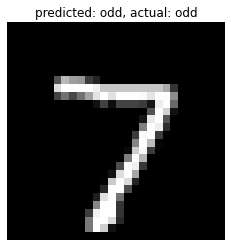

------------------------------------------------------------


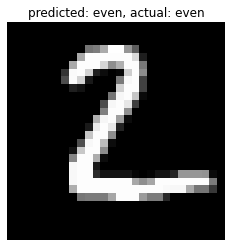

------------------------------------------------------------


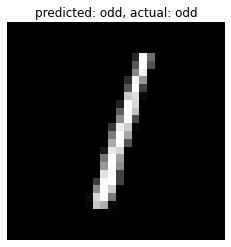

------------------------------------------------------------


In [44]:
# View predictions
for img_array, pred, actual in zip(X_new, Y_pred, y_test_bin[:3]):
    if pred == 1:
        pred = 'even'
    else:
        pred = 'odd'

    if actual == 1:
        actual = 'even'
    else:
        actual = 'odd'
    plt.imshow(img_array, cmap='gray')
    plt.title(f'predicted: {pred}, actual: {actual}')
    plt.axis('off')
    plt.show()
    print('--'*30)